In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Architecture of Regression Model

(1) Input Layer Shape----------Same Shape as number of features(e.g 3 for bedrooms, bathrooms, car spacing in housing price prediction)

(2) Hidden Layers----------Problem Specific, minimum=1, maximum=unlimited

(3) Neurons per hidden layer----------Problem Specific, generally 10 to 100

(4) Output layers shape----------Same shape as desired prediction shape(e.g 1 for house price)

(5) Hidden Activation----------Usually ReLU(Rectified Linear Unit)

(6) Output Activation----------None, ReLU, logistic,tanh

(7) Loss function----------MSE(Mean Square Error) or MAE(mean absolute error)/Huber(combination of MAE/MSE) if outliers

(8) Optimizer----------SGD(stochastic gradient descent), Adam


# Introduction to Regression in Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we are going to simplify it: redirecting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [3]:
print(tf.__version__)

2.15.0


# Creating data to view and fit

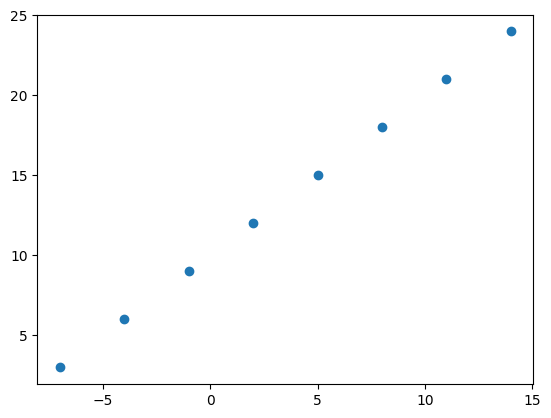

In [4]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, Y)

In [5]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output Shapes

In [6]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
input_shape_0 = X[0].shape
output_shape_0 = Y[0].shape
input_shape_0, output_shape_0    # The shape becomes zero because it is scalar.

((), ())

In [9]:
X[0].ndim

0

In [10]:
# Turn our Numpy arrays into tensors

X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)
X.shape, Y.shape

(TensorShape([8]), TensorShape([8]))

In [11]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

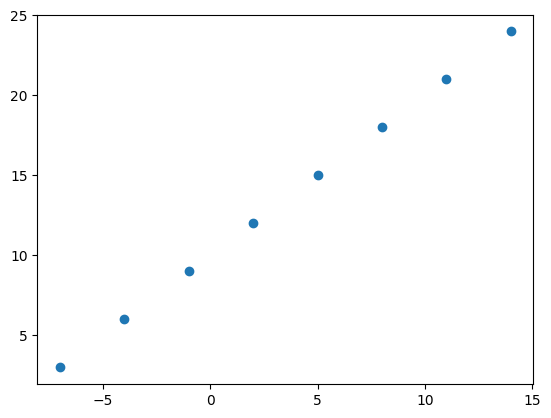

In [12]:
plt.scatter(X, Y)

# Steps in Modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function( in other words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting the model** - letting the model try to find patterns between x & Y(features and labels).


In [13]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using sequential API

model = tf.keras.Sequential([  # Sequential groups a linear stack of layers into Model
    tf.keras.layers.Dense(1)  # Dense usually refers to single layer
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,  # Loss function is used to optimize our model.
    optimizer=tf.keras.optimizers.SGD(), # We can also write optimizer='sgd'. Optimizer means how model should update its internal petterns to better its predictions.
    metrics=["mae"]  # A metric is a function that is used to judge the performance of your model.
    ) # mae is short for mean absolute error
    # SGD is short for stochastic gradient descent

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5) #Epochs is total number of iterations of all the training data in one cycle for training the machine learning model.

Epoch 1/5
1/1 [==============================] - 1s 772ms/step - loss: 14.1354 - mae: 14.1354
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 14.0029 - mae: 14.0029
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 13.8704 - mae: 13.8704
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 13.7379 - mae: 13.7379
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 13.6054 - mae: 13.6054


In [14]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our model

y_predict = model.predict([17.0])


1/1 [==============================] - 0s 152ms/step


#Improving our model
We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [16]:
# Let's rebuild our model

# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Learning rate is most important hyper paramteres for any neural networks.
    # Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
    metrics='mae'
)

# 3. Fit model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.3354 - mae: 14.3354
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 13.3290 - mae: 13.3290
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 12.3260 - mae: 12.3260
Epoch 4/100
1/1 [==============================] - 0s 28ms/step - loss: 11.3119 - mae: 11.3119
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.2698 - mae: 10.2698
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 9.1842 - mae: 9.1842
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 8.0404 - mae: 8.0404
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 7.3229 - mae: 7.3229
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 8.0260 - mae: 8.0260
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 8.7911 - mae: 8.7911
Epoch 11/100
1/1 [==============================] - 0s 13ms/s

In [17]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
model.predict([17.])

1/1 [==============================] - 0s 199ms/step


array([[28.049124]], dtype=float32)

#Evaluating a model

**In practice, a typical workflow you'll go through when building neural networks is:**

Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> evaluate it...

**When it comes to evaluation... there are 3 words you should memorize**
"Visualize, visualize, visualize"

**What to visualize:**
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how does the prediction of a model line up against ground truth (the original labels)?

In [19]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [20]:
# Make labels for dataset

Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

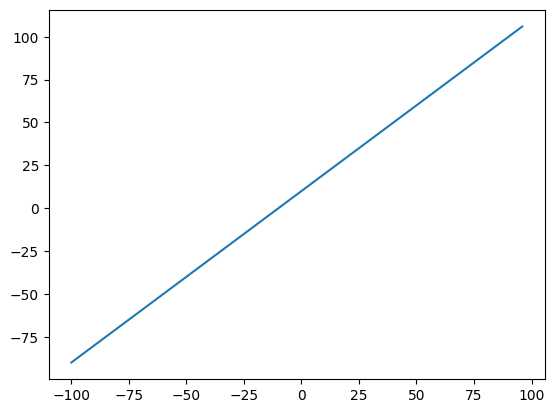

In [21]:
plt.plot(X, Y)

#The 3 sets
* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data you have available.
* **Test set** - the model gets evaluated in this data to test what is learned, this set is typically 10-15% of the total data you have available.

In [22]:
# Check the length of how many samples we have

len(X)

50

In [23]:
# Split the data into train and test

X_train = X[:40]
Y_train = Y[:40]


X_test = X[40:]
Y_test = Y[40:]

X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

#Visualizing the data
Now we have got our data in training and test sets... let's visualize it.

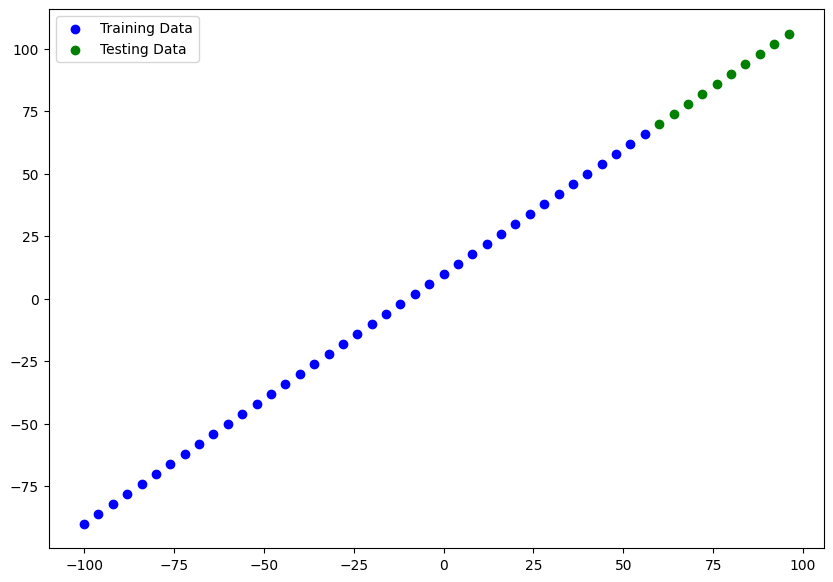

In [24]:
plt.figure(figsize=(10, 7))

# Plot training data in blue

plt.scatter(X_train, Y_train, c="b", label="Training Data") # our model will learn on this

# Plot testing data in green

plt.scatter(X_test, Y_test, c="g", label="Testing Data") # want our model to be able to predict this(given X, what's Y)

# Show Legend
plt.legend();

In [25]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics="mae"
)

# 3. Fit the model

# model.fit(tf.expnad_dims(X_train, axis=-1), Y, epochs=100)

In [26]:
X[0], Y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [27]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer

tf.random.set_seed(42)

# Create a model (same as above)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])  # input_shape=[1] means one input and one output
])

# Compile a model (same as above)

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics='mae'
)

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

In [29]:
# Let's fit the model

model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100, verbose=0) # verbose=1 shows the 100 epochs output verbose=0 doesn't

In [30]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer

tf.random.set_seed(42)

# Create a model (same as above)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1]),  # input_shape=[1] means one input and one output
    tf.keras.layers.Dense(1, name="output_layer")
], name="Model One")

# Compile a model (same as above)

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics='mae'
)

In [31]:
model.summary()

Model: "Model One"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 3)                 6         
                                                                 
 output_layer (Dense)        (None, 1)                 4         
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


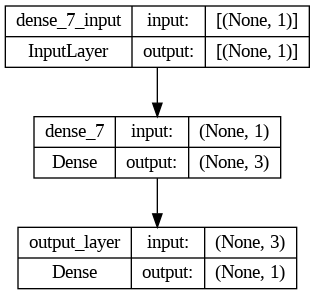

In [32]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [33]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, name="input_layer"),
    # tf.keras.layers.Dense(10, name="output_layer")
], name="Hello_World")


model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics='mae'
)


model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100, verbose=0)

In [34]:
model.summary()

Model: "Hello_World"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


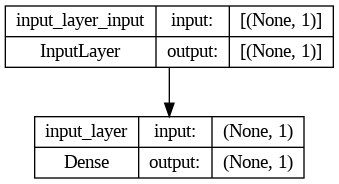

In [35]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

#Visualizing our model's prediction

To visualize predictions, it is a good idea to plot them against the ground truth labels.

Often you will see this in the form of **y_test** or **y_true** versus **y_pred** (ground truth versus your model's prediction).

In [36]:
# Make some predictions

Y_pred = model.predict(X_test)
Y_pred

1/1 [==============================] - 0s 63ms/step


array([[55.14956 ],
       [58.72504 ],
       [62.30052 ],
       [65.876   ],
       [69.45148 ],
       [73.026955],
       [76.60244 ],
       [80.17792 ],
       [83.753395],
       [87.32888 ]], dtype=float32)

In [37]:
tf.size(X_test)

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [38]:
tf.size(Y_pred)

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [39]:
Y_pred.shape

(10, 1)

In [40]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note** If we are going to reuse some functionality in the future, it's a good idea to turn them into function.

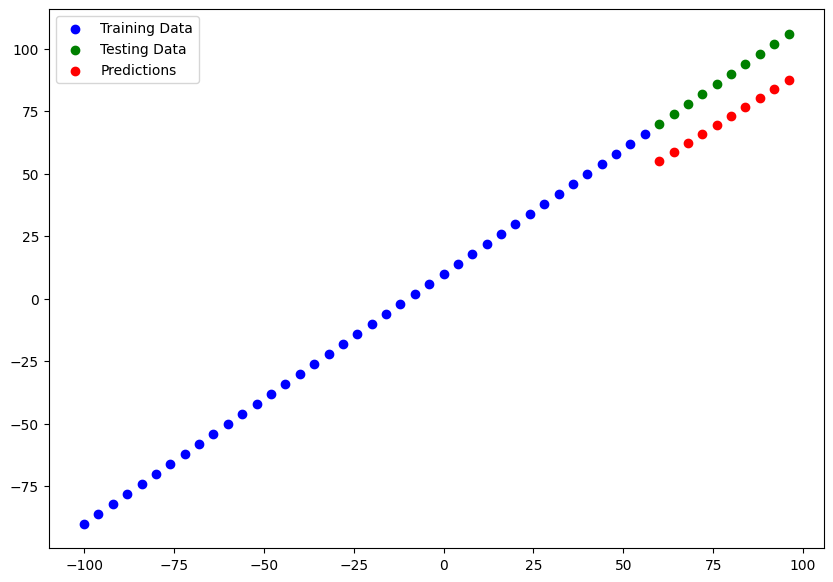

In [41]:
# Let's create a plotting functiom

def plot_prediction(train_data=X_train, train_labels=Y_train, test_data=X_test, test_labels=Y_test, predictions=Y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label="Training Data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label="Testing Data")
  # Plot model's prediction in red
  plt.scatter(test_data, predictions, c='r', label="Predictions")
  # Show the legend
  plt.legend()
plot_prediction(train_data=X_train, train_labels=Y_train, test_data=X_test, test_labels=Y_test, predictions=Y_pred)

#Evaluating our model's predictions with regression evaluation metrics.

Depwnding upon the problem we are working on, there will be different evaluation metrics to evaluate model's performance.

Since we are working on regression, two of the main metrics:
  * MAE - mean absolute error, "on average how wrong is each model's prediction"
  * MSE - mean square error, "square the average errors"


In [42]:
# Evaluate the model on the test

model.evaluate(X_test, Y_test)  # Answer is same because loss and metrics is same in model i.e "mae"

1/1 [==============================] - 0s 204ms/step - loss: 16.7608 - mae: 16.7608


[16.76078224182129, 16.76078224182129]

In [43]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [44]:
Y_pred = tf.constant(Y_pred)
Y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[55.14956 ],
       [58.72504 ],
       [62.30052 ],
       [65.876   ],
       [69.45148 ],
       [73.026955],
       [76.60244 ],
       [80.17792 ],
       [83.753395],
       [87.32888 ]], dtype=float32)>

In [45]:
# The shape of Y_test(shape=(10,)) and Y_pred(shape=(10, 1)) is not same. To make same shape we have to squeeze Y_pred

tf.squeeze(Y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([55.14956 , 58.72504 , 62.30052 , 65.876   , 69.45148 , 73.026955,
       76.60244 , 80.17792 , 83.753395, 87.32888 ], dtype=float32)>

In [46]:
# Calculate mean absolute error

tf.metrics.mean_absolute_error(Y_test, tf.squeeze(Y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=16.760782>

In [47]:
# Calculate mean square error

tf.metrics.mean_squared_error(Y_test, tf.squeeze(Y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=282.41058>

In [48]:
# Make a function to reuse MAE and MSE

def mae(Y_true, Y_pred):
  return tf.metrics.mean_absolute_error(Y_true, Y_pred)


def mse(Y_true, Y_pred):
  return tf.metrics.mean_squared_error(Y_true, Y_pred)

#Running experiments to improve our model

1. Get more data - get more examples for your model to train or (more opportunities to learn patterns or relationships between features and labels).

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

3. Train for longer - give your model more of a chance to find patterns in data.

#Let's do three modeling experiments
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

In [49]:
X_train, Y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [50]:
# Set Random seed
tf.random.set_seed(42)

# Create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)]
)

# Compile model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 29ms/step - loss: 87.3060 - mae: 87.3060
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 51.8505 - mae: 51.8505
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 16.4651 - mae: 16.4651
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 8.8086 - mae: 8.8086
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.7716 - mae: 10.7716
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.9655 - mae: 9.9655
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0213 - mae: 9.0213
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.1066 - mae: 9.1066
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 19.8327 - mae: 19.8327
Epoch 10/100
2/2 [==============================] - 0s 13ms/step - loss: 10.7337 - mae: 10.7337
Epoch 11/100
2/2 [==============================] - 0s 7ms/step 

In [51]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

1/1 [==============================] - 0s 60ms/step


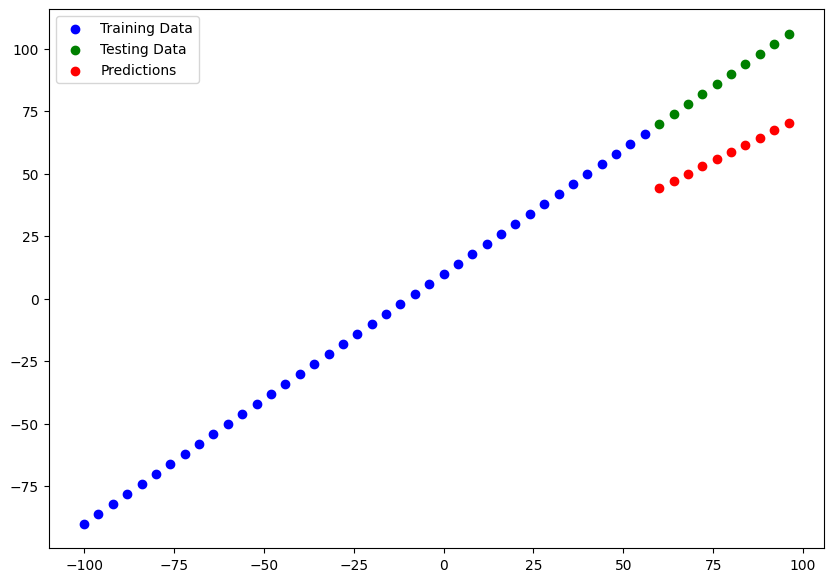

In [52]:
# MAke and plot predictions

y_preds_1 = model_1.predict(X_test)
plot_prediction(predictions=y_preds_1)

In [53]:
# Calculate model_1 evaluation metrics

mae_1 = mae(Y_test, tf.squeeze(y_preds_1))
mse_1 = mse(Y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.715214>,
 <tf.Tensor: shape=(), dtype=float32, numpy=953.91>)

#Build Model 2

In [54]:
# Set Random seed
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 10.6032 - mse: 226.1385
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4481 - mse: 1036.4606
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 26.3976 - mse: 1036.1669
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 15.5841 - mse: 345.0537
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 18.4839 - mse: 487.4107
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 13.4446 - mse: 252.7854
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 12.6195 - mse: 212.8972
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0336 - mse: 149.7845
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 39.7475 - mse: 2476.6333
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.2374 - mse: 1043.8594
Epoch 11/100
2/2 [==========================

1/1 [==============================] - 0s 75ms/step


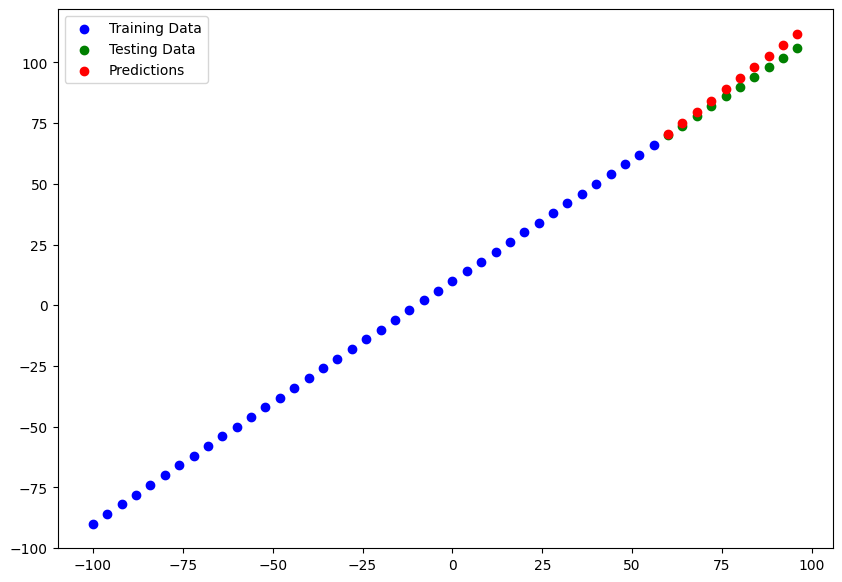

In [55]:
# Make and plot predictions of model 2

y_preds_2 = model_2.predict(X_test)
plot_prediction(predictions=y_preds_2)

In [56]:
# Calculate model_2 evaluation metrics

mae_2 = mae(Y_test, tf.squeeze(y_preds_2))
mse_2 = mse(Y_test, tf.squeeze(y_preds_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.142388>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.7150345>)

#Build Model 3
2 Layers, 500 epochs

Epoch 1/500
2/2 [==============================] - 0s 12ms/step - loss: 27.1736 - mse: 1020.6123
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 24.6048 - mse: 797.0685
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 24.0799 - mse: 837.7012
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 14.0945 - mse: 296.1786
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 17.7898 - mse: 450.3082
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 14.1798 - mse: 286.4484
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.4608 - mse: 159.5513
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.1859 - mse: 174.1283
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 41.6449 - mse: 2762.2173
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 28.8884 - mse: 1179.2889
Epoch 11/500
2/2 [===========================

1/1 [==============================] - 0s 80ms/step


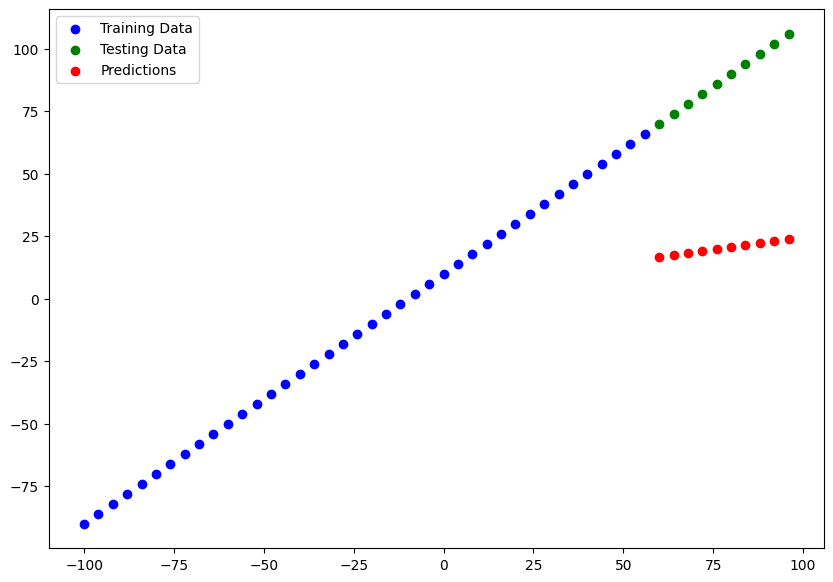

In [57]:
# Set Random seed
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=500)


# Make and plot some predictions

Y_preds_3 = model_3.predict(X_test)
plot_prediction(predictions=Y_preds_3)

In [58]:
# Calculate model_3 evaluation metrics

mae_3 = mae(Y_test, tf.squeeze(Y_preds_3))
mse_3 = mse(Y_test, tf.squeeze(Y_preds_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.59866>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4653.5854>)

🔑 **Note** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

#Comapring the results of our experiments

We've run a few experiments, let's compare the results.

In [59]:
# Let's compare our model's results using pandas DataFrame

import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]
                 ]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.715214,953.909973
1,model_2,3.142388,12.715034
2,model_3,67.598663,4653.585449


In [60]:
# Looks like model_2 performs best
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


🔑 **Note** One of our main goals should be to minimize the time between experiments.

##Tracking Experiments

One really good habit in ML modelling is to track the results of experiments.

And when doing so, it can be tedious if there are running lots of experiments.

Luckily, there are tools to help us!

📔 **Resource:** As we build more models, we want to look into using:

* **Tensorboard** - a component ot the TensorFlow library to help track modelling experiments.
* **Weights and Biases** - a tool for tracking all kinds of machine learniing experiments (plugs straight into Tensorboard)

**Saving Our Models**

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in web application or a mobile app.

There are two main formats we can save our model's too:
1. The SavedModel format
2. The HDF5

In [62]:
# Save model using the SaveModel format

model_2.save("Saved_Model")

In [63]:
# Save Model using HDF5 format

model_2.save("saved_model.h5") # .h5 format is used when the code has to be used in another file.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Loading in a saved model

In [64]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/Saved_Model")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
# Compare model_2 predictions with SavedModel format model predictions

model_2_preds = model_2.predict(X_test)

loaded_SaveModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SaveModel_format_preds

1/1 [==============================] - 0s 74ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [68]:
loaded_h5_model = tf.keras.models.load_model("/content/saved_model.h5")

model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 53ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

#Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can got to files tab and right click on the file you're after and click "download"

In [ ]:
# Download a file from Google Colab

from google.colab import files
files.download("/content/saved_model.h5")

In [ ]:
# save a file from Google Colab to Google Drive (requires mounting Google Drive)

!cp /content/sample_data "folder_path"

#A Larger Example